# Secondo Esperimento

## Fit da fare

Dobbiamo fittare con l'equazione:
$$
V_{CE} = a + b I_C
$$

dove trascuriamo gli errori sulla corrente $I_C$ perchè misurata col multimetro

Esso verrà fatto nella parte di grafico che ha andamento lineare, cioè da circa $|V| > 1$

### Corrente di base: $- 200 \mu A$

a_1 =  12.380 ± 0.30873  V
b_1 =  431.267 ± 9.42267  V/A


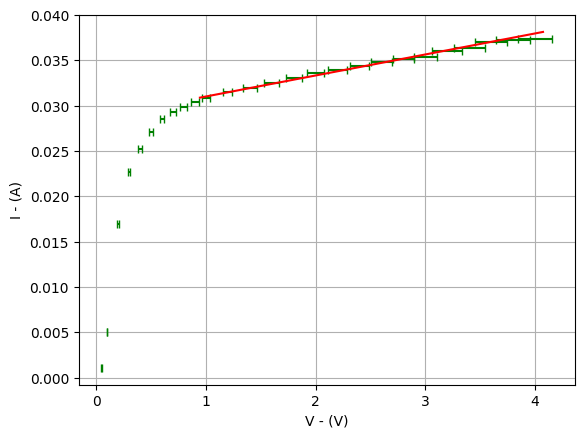

In [40]:
import numpy as np
from matplotlib import pyplot as plt  # this is the traditional method
from scipy.optimize import curve_fit  # import method used here

#we define the function for the linear fit
def linear_fit(x, a, b):
    return a + b*x

#we define a function to evaluate the measurement error of the oscilloscope, we use 1/2 as the factor for the appreciable lines.(except for sz which is calculated before with factor 1)
def oscilloscope_error(sz, f_s, measure):
    sl = f_s/10
    sc = measure*0.03
    return np.sqrt(sz**2 + sl**2 + sc**2)

#we calculated the error on zero as
s_z = 0.0002 #(V)

file_to_analyze = "-200.txt"
Data = np.loadtxt("Dati/" + file_to_analyze, float, skiprows=1, comments= "#")
I_1 = Data[:, 0] * 0.001 #li trasformo in Ampere
V_1 = Data[:, 1]
f_s_V_1 = Data[:, 2]

#evaluate the error on the oscilloscope
error_V_1 = oscilloscope_error(s_z, f_s_V_1, V_1)

# initial guess
a = 0
b = 1
initial_guess = np.array([a,b])

#I want to do the fit for the data |V| > 1 V
counter = 0
for x in V_1:
    if np.abs(x) >= 1:
        counter += 1

#select the data for the fit
I_f_1 = I_1[:counter]
V_f_1 = V_1[:counter]
error_V_f_1 = error_V_1[:counter]

#fit the data
fit_1, cov_1 = curve_fit(linear_fit, I_f_1, V_f_1, sigma=error_V_f_1, p0=initial_guess)

error_1 = np.sqrt(np.diag(cov_1))

# print the results
print('a_1 = ', '{:.3f}'.format(fit_1[0]), '±', '{:.5f}'.format(error_1[0]), ' V')
print('b_1 = ', '{:.3f}'.format(fit_1[1]), '±', '{:.5f}'.format(error_1[1]), ' Ohm')

#plot the fits
plt.xlabel("V - (V)")
plt.ylabel("I - (A)")

simul_I_1 = np.linspace(102 / 100 * I_f_1[0], I_f_1[len(I_f_1) - 1], 100)
simul_V_1 = linear_fit(simul_I_1, fit_1[0], fit_1[1])

plt.errorbar(np.abs(V_1), np.abs(I_1), xerr=error_V_1, linestyle="none", color="green", capsize=3, capthick=1, label="I") #data with error
plt.errorbar(np.abs(simul_V_1), np.abs(simul_I_1), label="fit I", color="red") #fit

plt.grid(True)
plt.savefig("Out/-200")
plt.show()

Voglio mostrare meglio la parte fittata

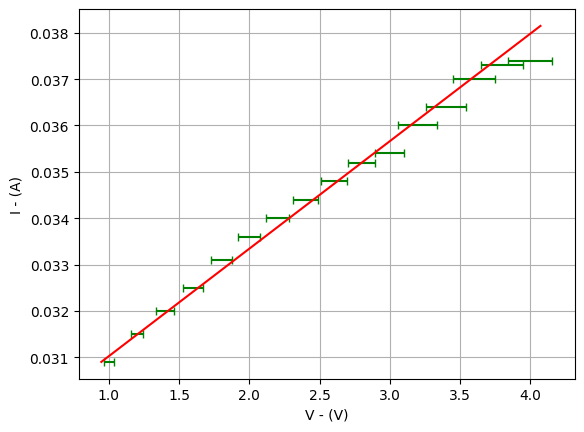

In [41]:
plt.xlabel("V - (V)")
plt.ylabel("I - (A)")

plt.errorbar(np.abs(V_f_1), np.abs(I_f_1), xerr=error_V_f_1, linestyle="none", color="green", capsize=3, capthick=1, label="I") #data with error
plt.errorbar(np.abs(simul_V_1), np.abs(simul_I_1), label="fit I", color="red") #fit

plt.grid(True)
plt.savefig("Out/-200-fit")
plt.show()

### Corrente di base: $- 100 \mu A$

a_2 =  19.020 ± 0.38047  V
b_2 =  1074.193 ± 19.68385  V/A


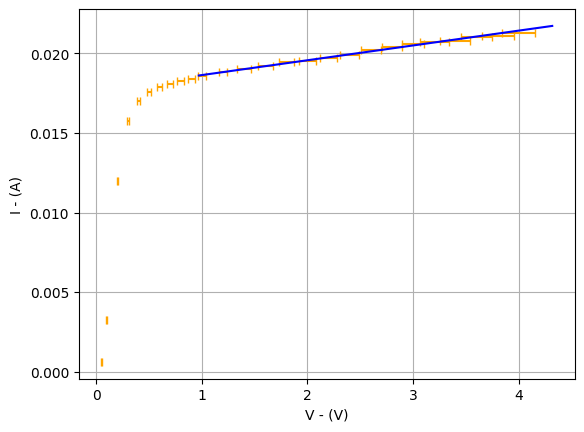

In [42]:
file_to_analyze = "-100.txt"
Data = np.loadtxt("Dati/" + file_to_analyze, float, skiprows=1, comments= "#")
I_2 = Data[:, 0] * 0.001
V_2 = Data[:, 1]
f_s_V_2 = Data[:, 2]

#evaluate the error on the oscilloscope
error_V_2 = oscilloscope_error(s_z, f_s_V_2, V_2)

# initial guess
a = 0
b = 1
initial_guess = np.array([a,b])

#I want to do the fit for the data |V| > 1 V
counter = 0
for x in V_2:
    if np.abs(x) >= 1:
        counter += 1

#select the data for the fit
I_f_2 = I_2[:counter]
V_f_2 = V_2[:counter]
error_V_f_2 = error_V_2[:counter]

#fit the data
fit_2, cov_2 = curve_fit(linear_fit, I_f_2, V_f_2, sigma=error_V_f_2, p0=initial_guess)

error_2 = np.sqrt(np.diag(cov_2))

# print the results
print('a_2 = ', '{:.3f}'.format(fit_2[0]), '±', '{:.5f}'.format(error_2[0]), ' V')
print('b_2 = ', '{:.3f}'.format(fit_2[1]), '±', '{:.5f}'.format(error_2[1]), ' Ohm')

#plot the fits
plt.xlabel("V - (V)")
plt.ylabel("I - (A)")

simul_I_2 = np.linspace(102 / 100 * I_f_2[0], I_f_2[len(I_f_2) - 1], 100)
simul_V_2 = linear_fit(simul_I_2, fit_2[0], fit_2[1])

plt.errorbar(np.abs(V_2), np.abs(I_2), xerr=error_V_2, linestyle="none", color="orange", capsize=3, capthick=1, label="I") #data with error
plt.errorbar(np.abs(simul_V_2), np.abs(simul_I_2), label="fit I", color="blue") #fit

plt.grid(True)
plt.savefig("Out/-100")
plt.show()

Guardo solo la parte del fit:

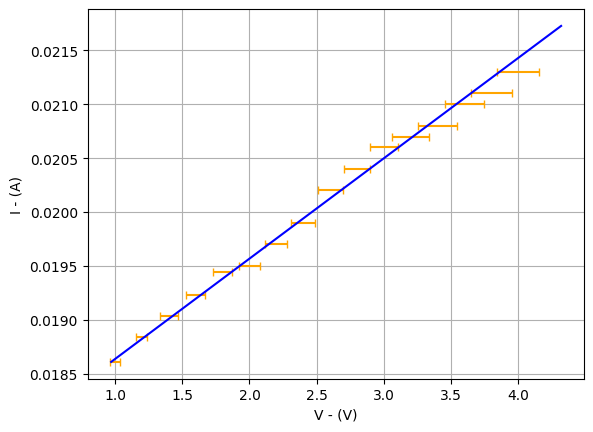

In [43]:
plt.xlabel("V - (V)")
plt.ylabel("I - (A)")

plt.errorbar(np.abs(V_f_2), np.abs(I_f_2), xerr=error_V_f_2, linestyle="none", color="orange", capsize=3, capthick=1, label="I") #data with error
plt.errorbar(np.abs(simul_V_2), np.abs(simul_I_2), label="fit I", color="blue") #fit

plt.grid(True)
plt.savefig("Out/-100-fit")
plt.show()

### Connfronto
Confronto i 2 grafici

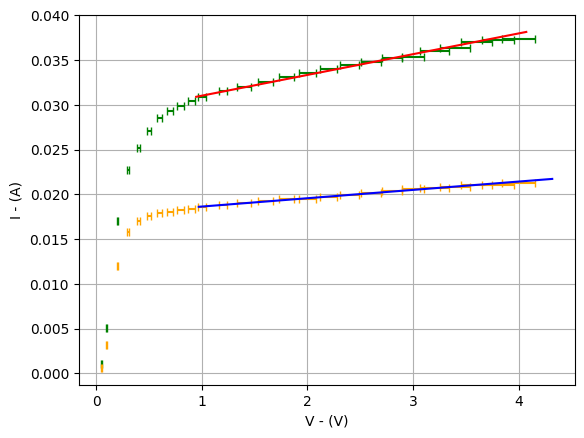

In [44]:
plt.xlabel("V - (V)")
plt.ylabel("I - (A)")

plt.errorbar(np.abs(V_1), np.abs(I_1), xerr=error_V_1, linestyle="none", color="green", capsize=3, capthick=1, label="I") #data with error
plt.errorbar(np.abs(simul_V_1), np.abs(simul_I_1), label="fit I", color="red") #fit

plt.errorbar(np.abs(V_2), np.abs(I_2), xerr=error_V_2, linestyle="none", color="orange", capsize=3, capthick=1, label="I") #data with error
plt.errorbar(np.abs(simul_V_2), np.abs(simul_I_2), label="fit I", color="blue") #fit

plt.grid(True)
plt.savefig("Out/Confronto")
plt.show()

### Calcolo dei vari parametri
I parametri del fit rappresentano \
$a =$ potenziale in uscita $V_A$ \
$b = \frac{\Delta V_{CE}}{\Delta I_C}$


Vogliamo calcolare la conduttanza di uscita $g = \frac{\Delta I_C}{\Delta V_{CE}} = \frac{1}{b}$, il suo errore sarà $\delta g = \frac{\delta b}{b^2}$

In [45]:
# we evaluate g
g_1 = 1/fit_1[1]
delta_g_1 = error_1[1] / (fit_1[1]**2)
g_2 = 1/fit_2[1]
delta_g_2 = error_2[1] / (fit_2[1]**2)

print('for I = - 200 micro A')
print('g = ', '{:.6f}'.format(g_1), '±', '{:.6f}'.format(delta_g_1))
print('for I = - 100 micro A')
print('g = ', '{:.6f}'.format(g_2), '±', '{:.6f}'.format(delta_g_2))

for I = - 200 micro A
g =  0.002319 ± 0.000051
for I = - 100 micro A
g =  0.000931 ± 0.000017


Vogliamo poi calcolare anche $\beta = \frac{\Delta I_C}{\Delta I_B}$
dove fissiamo $V_{CE} = -3 V$

(si può fare a mano)